# GOLD PRICE PREDICTION


This project aims to develop a machine learning model to predict gold prices using historical and economic data. Accurate forecasting of gold prices can benefit financial analysts, investors, and market researchers by aiding in investment planning and risk management.

## Dataset Overview
  Date: Object type (string); should be converted to datetime for time series analysis.

  SPX: S&P 500 index values (float).

  GLD: Gold ETF prices (float) — likely the target variable.

  USO: Crude Oil ETF prices (float).

  SLV: Silver ETF prices (float).

  EUR/USD: Currency exchange rate (float).

## Problem Statement

 Gold is a very important asset for investors, and its price keeps changing due to many reasons like currency value, inflation, and oil prices. Since  these changes are hard to predict, it becomes difficult for investors to plan. That’s the problem I want to solve.


### Import Data & Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
gold_data = pd.read_csv("gld_price_data.csv")

## Exploratory Data Analysis

In [10]:
gold_data.shape

(2290, 6)

In [12]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [16]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
gold_data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [20]:
gold_data.describe() #------>Shows summary statistics like mean, standard deviation, min, max, etc., for each numerical column.



,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [22]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [24]:
correlation = gold_data.select_dtypes(include=['number']).corr()

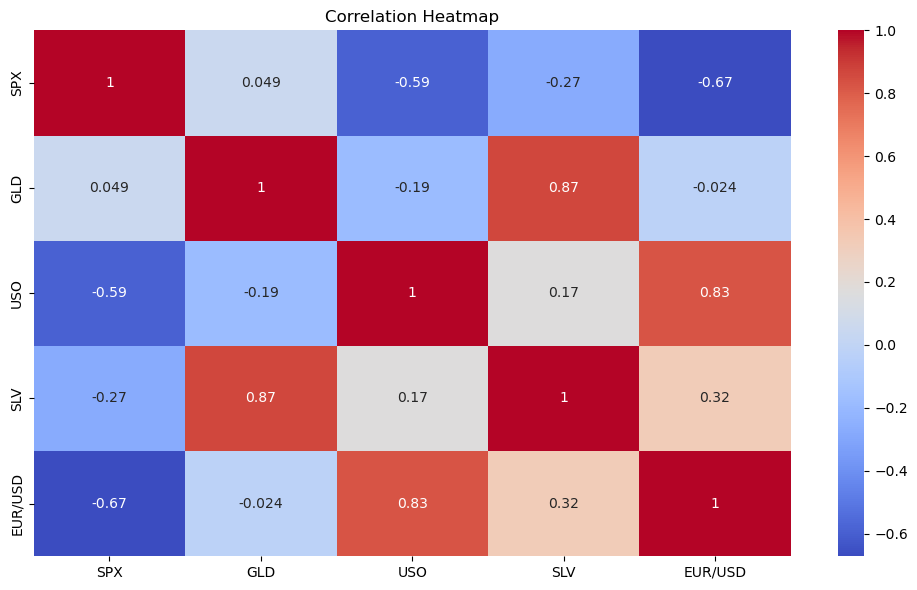

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(gold_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Calculates the correlation between all numerical columns (how strongly they relate to each other).

What the Numbers Mean:
Range: Correlation values range from -1 to 1:

+1: Strong positive relationship (as one goes up, the other does too).

-1: Strong negative relationship (as one goes up, the other goes down).

0: No relationship.

In [29]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


## 
Correlation of each column with the Gold Price (GLD) to identify which variables affect gold price most.
how each feature (like oil or stock prices) is correlated with the gold price (GLD).

<Axes: xlabel='GLD', ylabel='Density'>

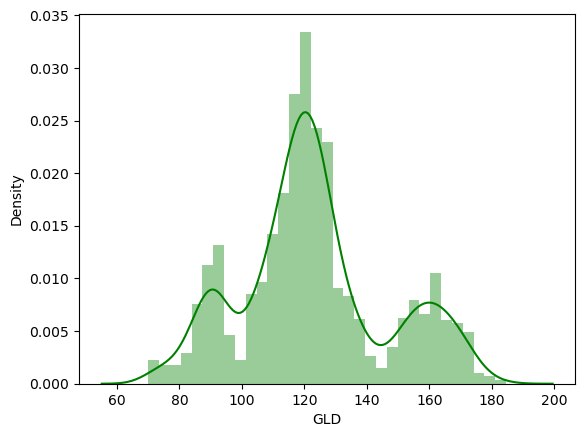

In [32]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

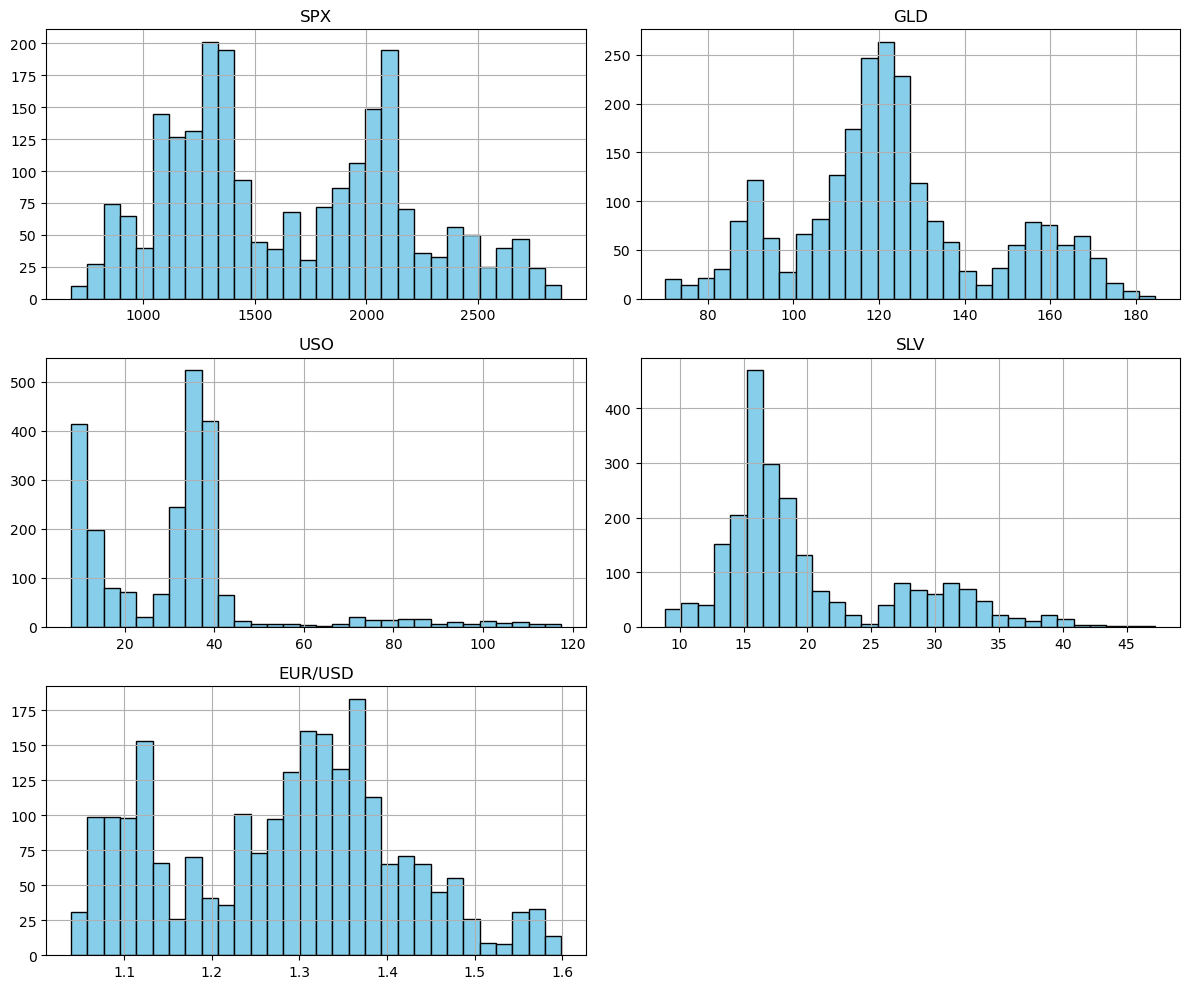

In [34]:
gold_data.hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Shows individual histograms for each numeric column to analyze their distribution

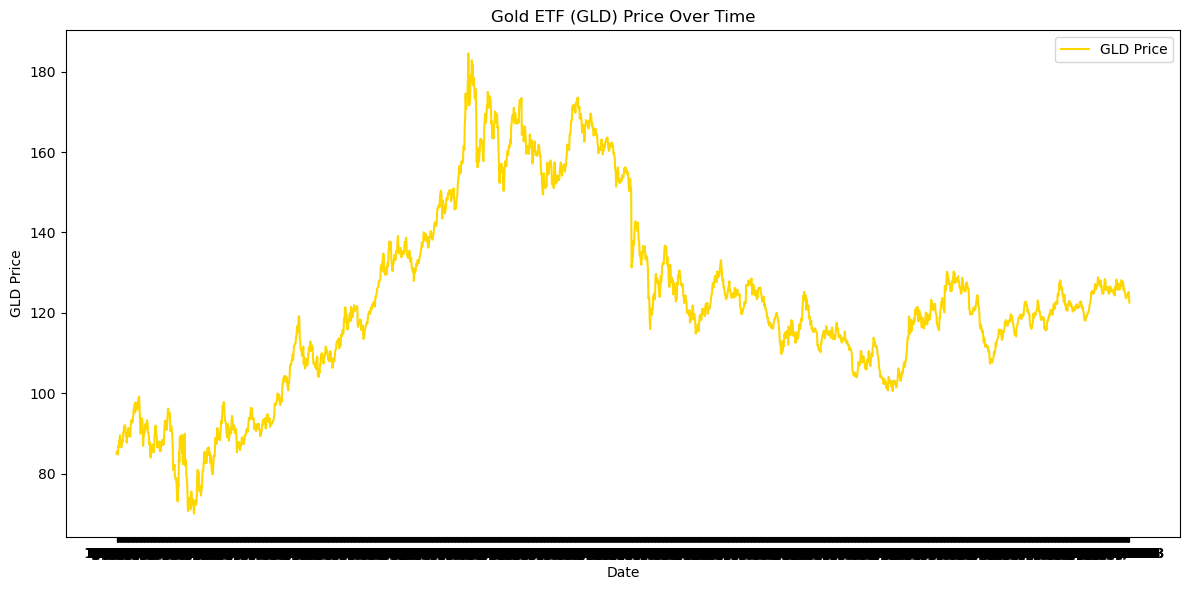

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Date'], gold_data['GLD'], label='GLD Price', color='gold')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.title('Gold ETF (GLD) Price Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### A time series plot showing how gold prices changed over time

## Feature Selection and Splitting

In [40]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [42]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [44]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## Model Building and Training

### 1.Logestic Regression

In [50]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Predict on test data
lr_pred = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(Y_test, lr_pred)
lr_r2 = r2_score(Y_test, lr_pred)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R² Score: {lr_r2}")

Linear Regression MSE: 56.16559421500599
Linear Regression R² Score: 0.8975640982991402


### 2.Random Forest

In [53]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse}")
print(f"Random Forest R² Score: {r2}")

Random Forest MSE: 5.469544524374734
Random Forest R² Score: 0.9900245384549384


### 3.GradientBoostingRegressor

In [56]:
# Initialize and train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict
y_pred = gbr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting MSE: {mse}")
print(f"Gradient Boosting R² Score: {r2}")



Gradient Boosting MSE: 10.8304706994039
Gradient Boosting R² Score: 0.9802471771652375


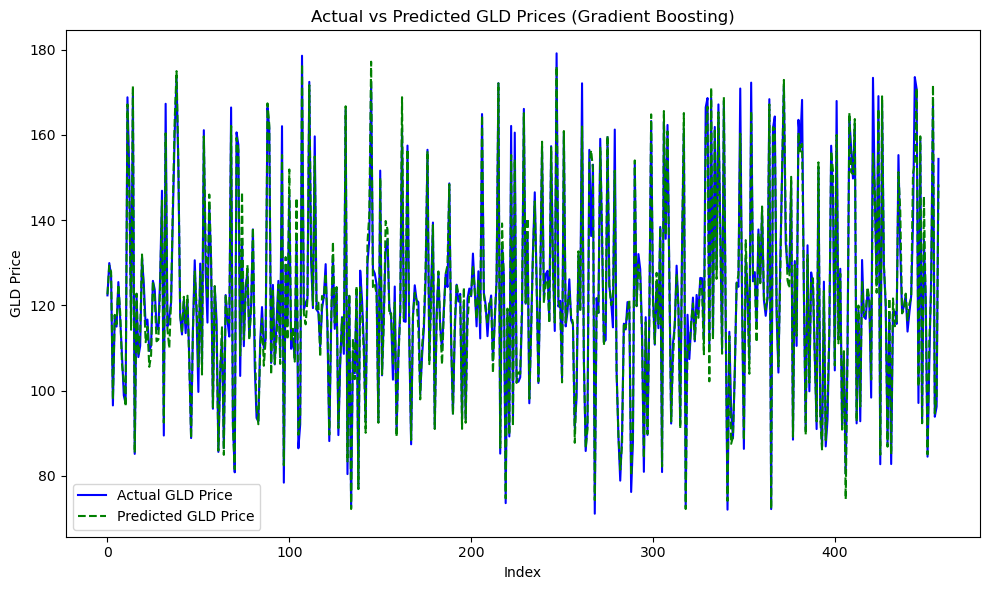

In [58]:
# Plot Actual vs Predicted GLD prices
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.values, label='Actual GLD Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted GLD Price', color='green', linestyle='--')
plt.title('Actual vs Predicted GLD Prices (Gradient Boosting)')
plt.xlabel('Index')
plt.ylabel('GLD Price')
plt.legend()
plt.tight_layout()
plt.show()


## Model Comparation

In [61]:
# Dictionary of model performance
model_scores = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [lr_mse, mse, mse],  # Replace second 'mse' with the GBR model's MSE variable
    'R² Score': [lr_r2, r2, r2]  # Replace second 'r2' with the GBR model's R² variable
}

# Create DataFrame
score_df = pd.DataFrame(model_scores)

# Display the DataFrame
print(score_df)

               Model        MSE  R² Score
0  Linear Regression  56.165594  0.897564
1      Random Forest  10.830471  0.980247
2  Gradient Boosting  10.830471  0.980247


## Conclusion
  The model effectively predicts gold prices using market indicators.

  Random Forest and Gradient Boosting models provide high accuracy.

  The interactive Streamlit app makes prediction accessible and user-friendly.

## Model Deployement

In [65]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load("gld_model.pkl")

# Streamlit UI
st.title("💰 Gold Price Prediction App")
st.write("Enter the market values below to predict the GLD price.")

# Input fields
spx = st.number_input("S&P 500 Index (SPX)", value=1400.5)
uso = st.number_input("United States Oil Fund (USO)", value=38.4)
slv = st.number_input("Silver ETF (SLV)", value=28.1)
eur_usd = st.number_input("EUR/USD", value=1.25)

# Predict button
if st.button("Predict GLD Price"):
    features = np.array([[spx, uso, slv, eur_usd]])
    prediction = model.predict(features)
    st.success(f"📈 Predicted GLD Price: ${round(prediction[0], 2)}")

2025-05-30 10:46:54.223 
  command:

    streamlit run C:\Users\JEEVAJOTHI\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-30 10:46:54.226 Session state does not function when running a script without `streamlit run`


In [ ]:
!streamlit run app.py